In [1]:
import pandas as pd
import numpy as np
import acquire
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

In [2]:
plt.rc('figure', figsize=(14,8))

In [3]:
df = acquire.get_clean_data()

In [4]:
df = df.sort_index()
df.head(3)

,sale_amount,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
sale_date,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2013-01-01 00:00:00+00:00,26.0,211817,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,7,TX,78217
2013-01-01 00:00:00+00:00,27.0,832657,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,7,TX,78217


In [5]:
df['sales_total'] = df.sale_amount * df.item_price

In [6]:
df.head(3)

,sale_amount,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,sales_total
sale_date,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,10.92
2013-01-01 00:00:00+00:00,26.0,211817,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,218.40
2013-01-01 00:00:00+00:00,27.0,832657,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,125.55


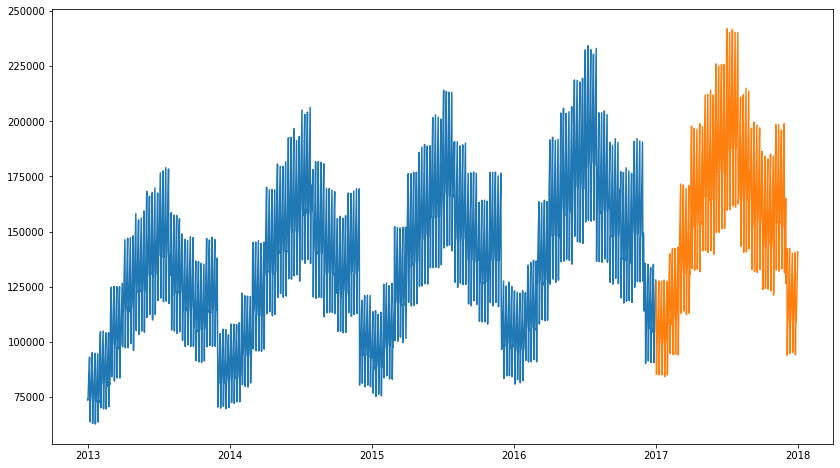

In [7]:
train = df[:'2016'].sales_total.resample('D').sum()
test = df['2017':].sales_total.resample('D').sum()

plt.plot(train.index, train)
plt.plot(test.index, test)

Clear seasonality displayed for summer and winter months

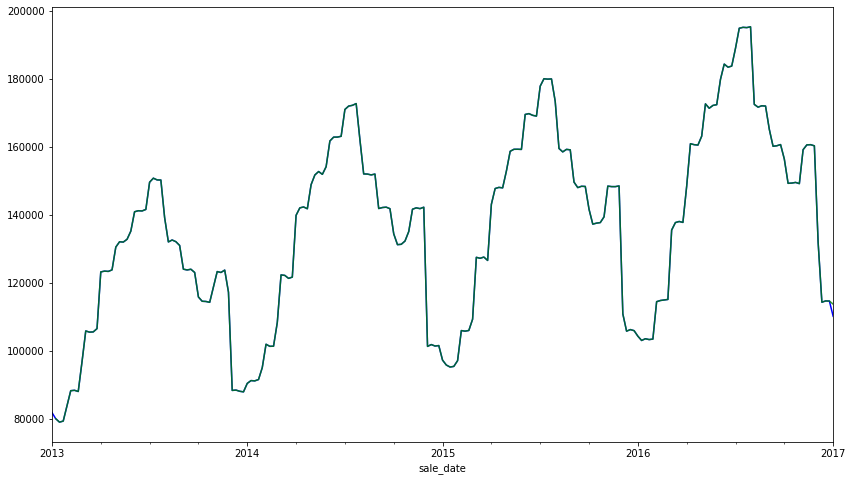

In [8]:
train.resample('W').mean().plot(color='blue')
train.rolling(7).mean().plot(alpha=.8,color='green')

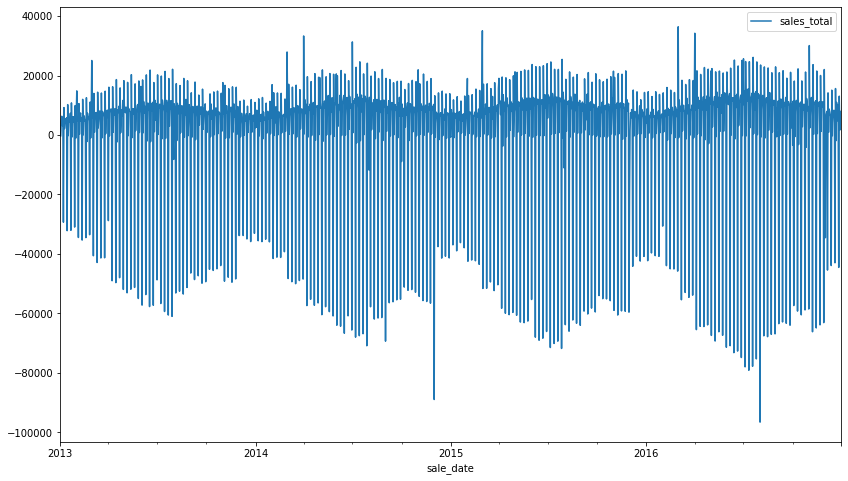

In [9]:
train = pd.DataFrame(train)
# train['diff'] = train.diff(1)
# sns.lineplot(x=train.index, y=train.sales_total, data=train)
train.diff(1).plot()

Time series decomposition

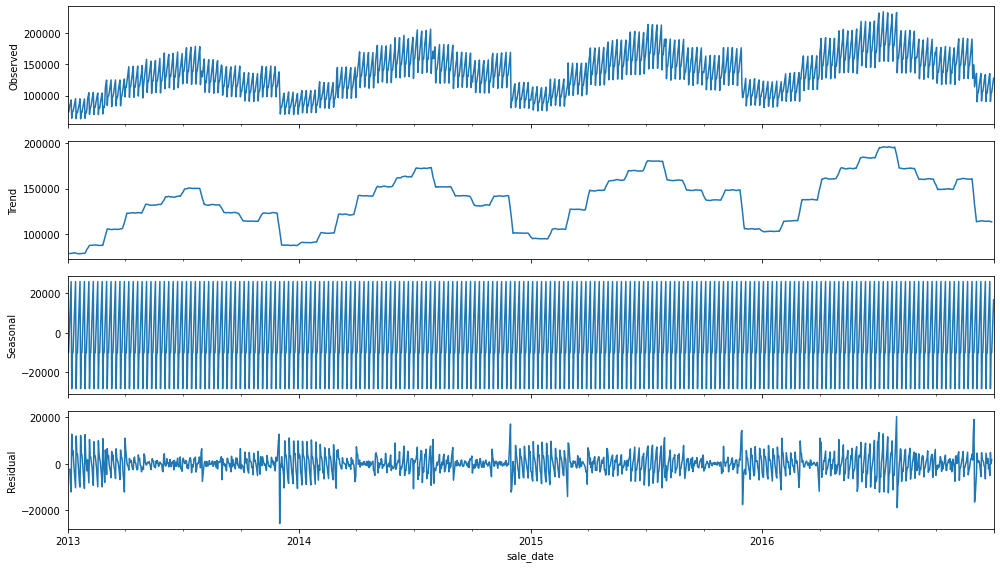

In [10]:
# y = train.sales_total.resample('W').mean()

result = sm.tsa.seasonal_decompose(train).plot()
# decomposition = pd.DataFrame({
#     'y': result.observed,
#     'trend': result.trend,
#     'seasonal': result.seasonal,
#     'resid': result.resid,
# })

# decomposition.iloc[:, 1:].plot()

Very low residuals indicate low noise or randomness, also note mild upward trend

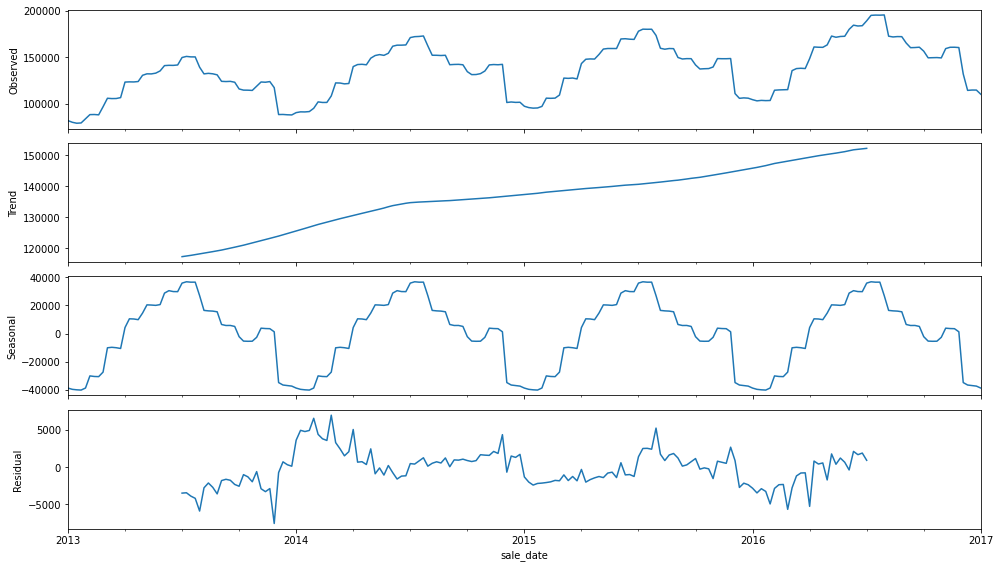

In [11]:
result = sm.tsa.seasonal_decompose(train.resample('W').mean()).plot()

In [12]:
# result.plot()
# None

In [13]:
train

,sales_total
sale_date,
2013-01-01 00:00:00+00:00,73844.01
2013-01-02 00:00:00+00:00,73570.58
2013-01-03 00:00:00+00:00,78169.48
2013-01-04 00:00:00+00:00,84467.73
2013-01-05 00:00:00+00:00,87621.85
...,...
2016-12-27 00:00:00+00:00,103657.89
2016-12-28 00:00:00+00:00,105313.94
2016-12-29 00:00:00+00:00,113221.85


In [14]:
train['day'] = train.index.dayofweek
train

,sales_total,day
sale_date,,
2013-01-01 00:00:00+00:00,73844.01,1
2013-01-02 00:00:00+00:00,73570.58,2
2013-01-03 00:00:00+00:00,78169.48,3
2013-01-04 00:00:00+00:00,84467.73,4
2013-01-05 00:00:00+00:00,87621.85,5
...,...,...
2016-12-27 00:00:00+00:00,103657.89,1
2016-12-28 00:00:00+00:00,105313.94,2
2016-12-29 00:00:00+00:00,113221.85,3


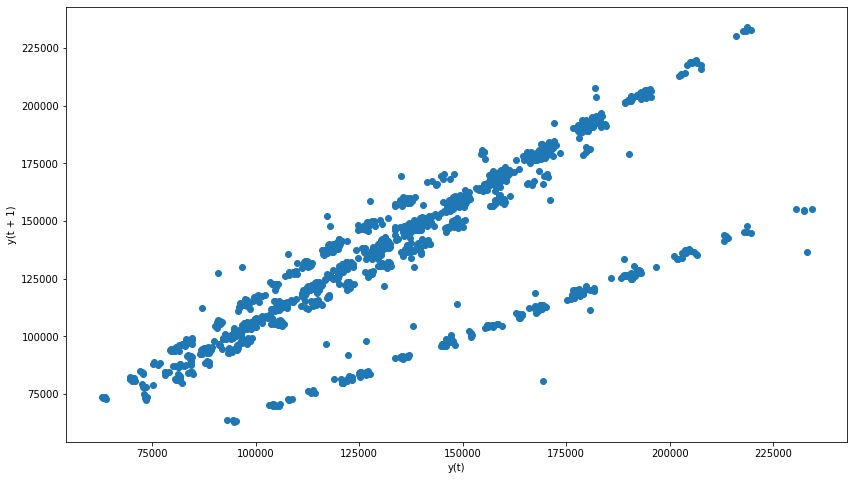

In [15]:
pd.plotting.lag_plot(train.sales_total, lag=1, label=train.day)

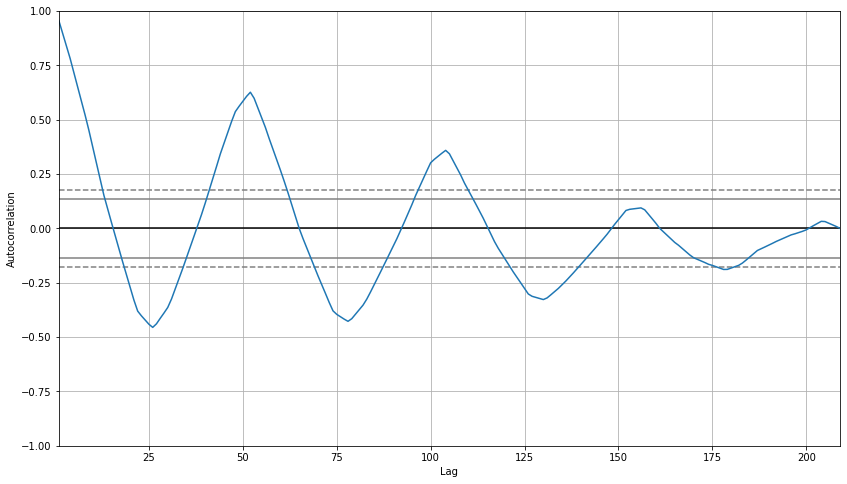

In [16]:
pd.plotting.autocorrelation_plot(train.sales_total.resample('W').mean())

In [17]:
df = acquire.get_power_data()

In [18]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


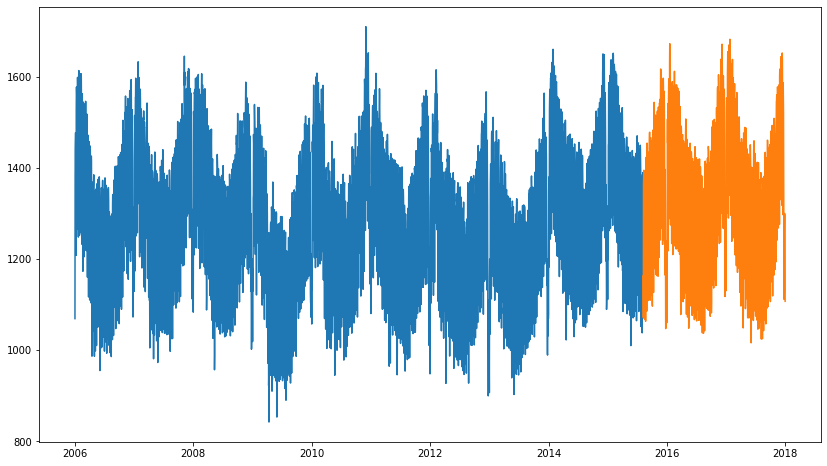

In [19]:
train_size = .80
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] 
test = df[test_start_index:]

plt.plot(train.index, train.Consumption)
plt.plot(test.index, test.Consumption)

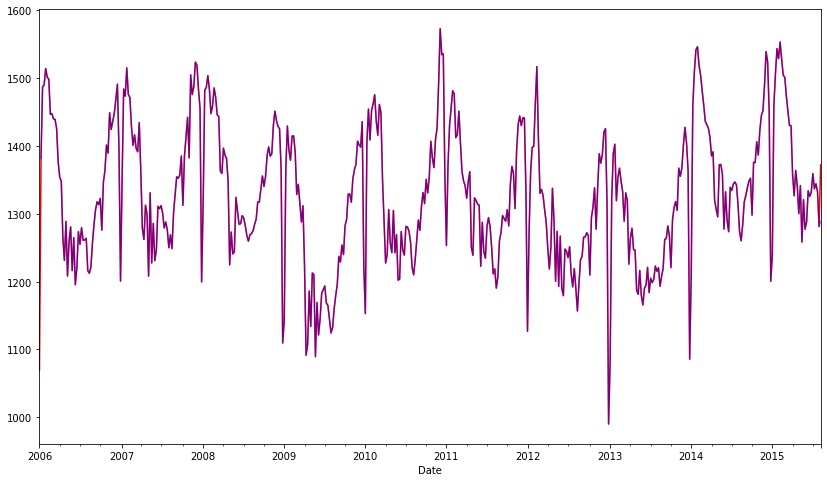

In [20]:
train.Consumption.resample('W').mean().plot(color='red')
train.Consumption.rolling(7).mean().plot(alpha=.5,color='blue')

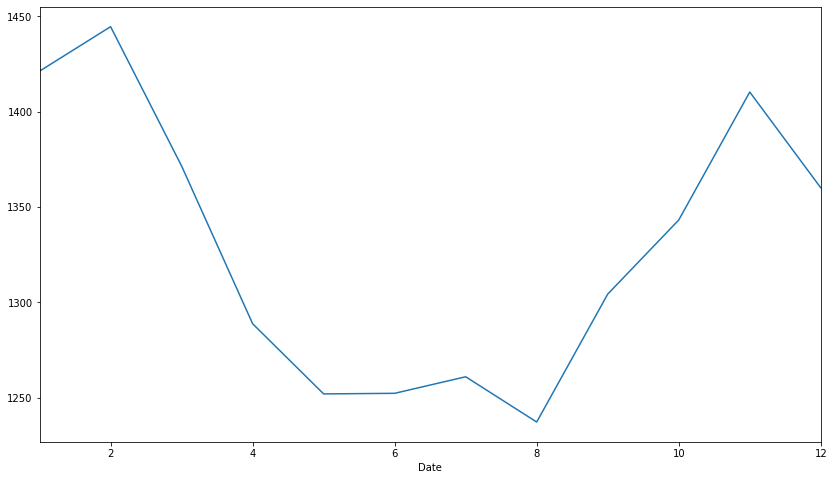

In [21]:
train.groupby(train.index.month).Consumption.mean().plot()

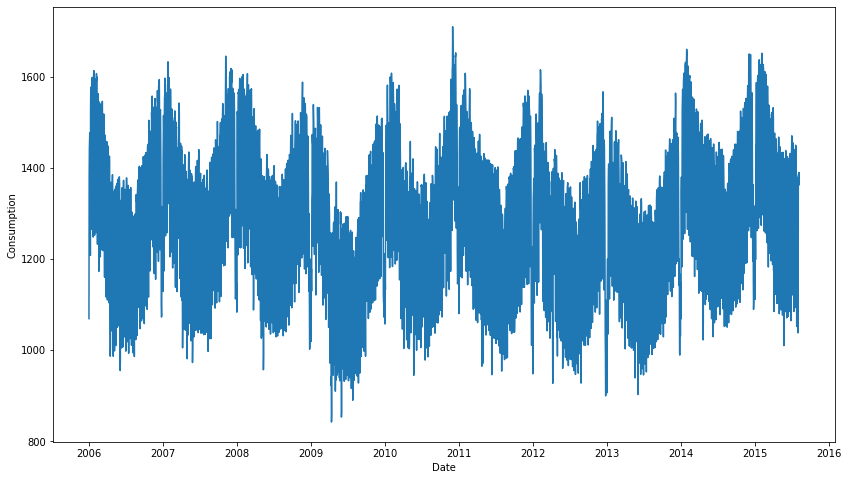

In [22]:
train['diff'] = train.Consumption.diff(1)
sns.lineplot(x=train.index, y='Consumption', data=train)

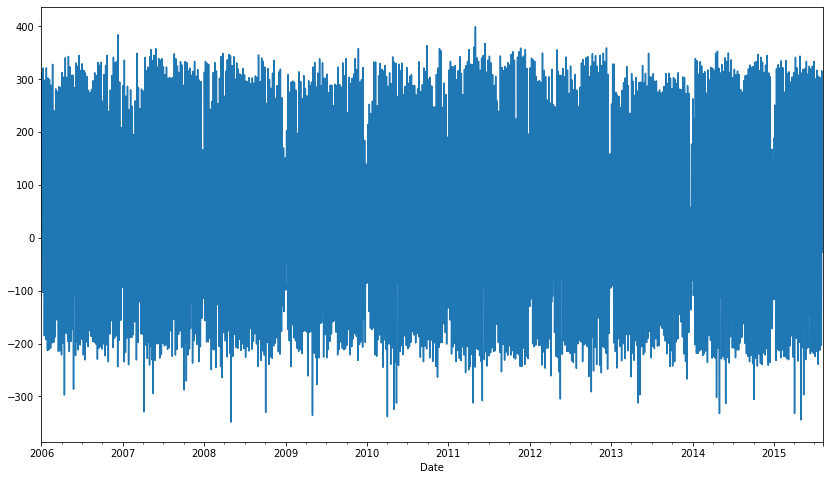

In [23]:
train['diff'].plot()

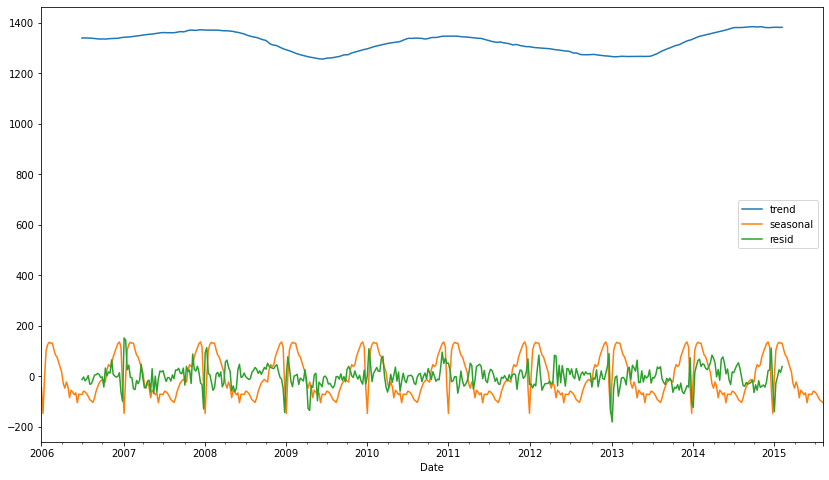

In [24]:
y = train.Consumption.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})

decomposition.iloc[:, 1:].plot()

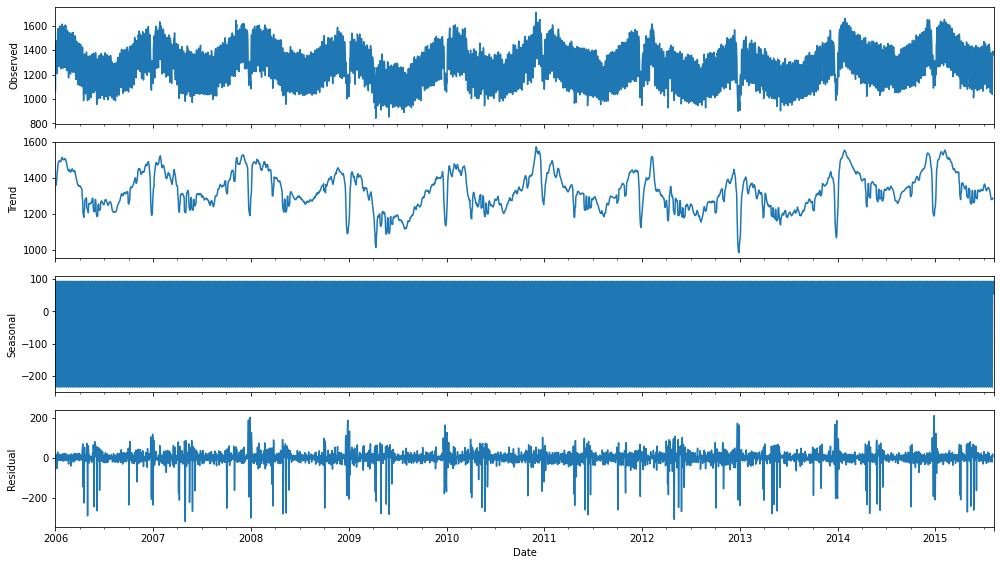

In [25]:
sm.tsa.seasonal_decompose(train.Consumption.resample('D').mean()).plot()
None

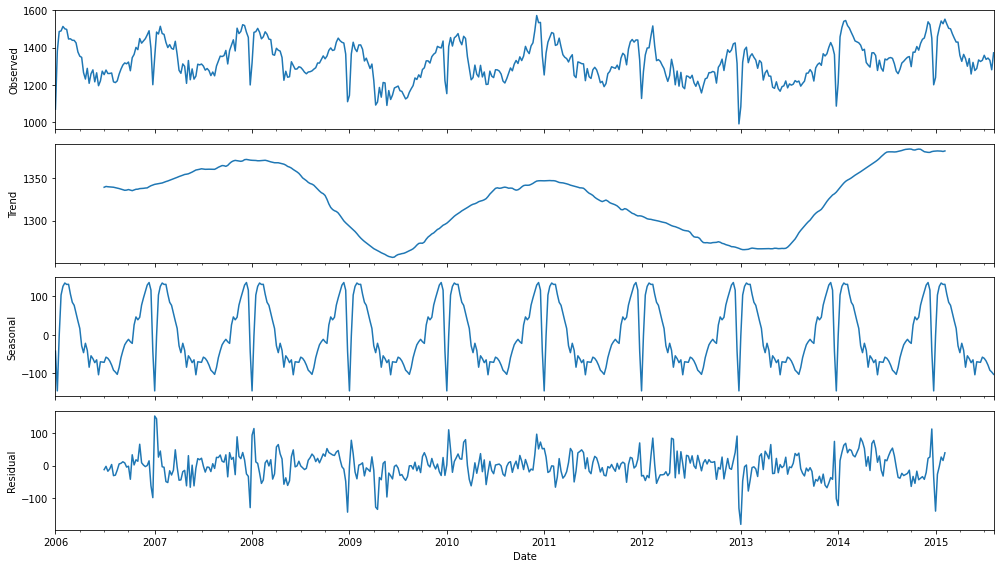

In [26]:
result.plot()
None